In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as ms
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv("ex2data1.txt",header=None)
df.columns = "Exam-Score-1","Exam-Score-2","Target"
y = df['Target'].values
X = df.drop('Target',axis=1).values
df

,Exam-Score-1,Exam-Score-2,Target
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


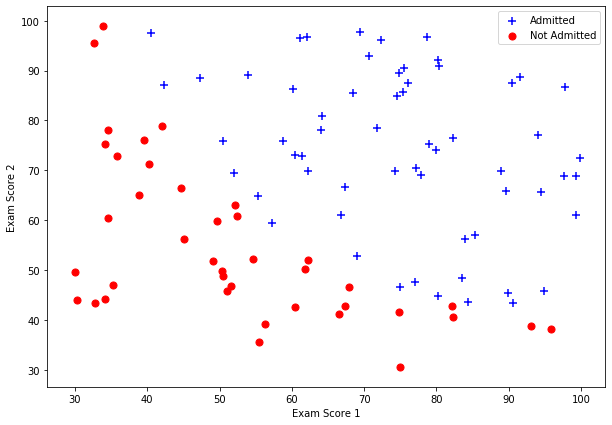

In [5]:
pos = np.where(y==1)
neg = np.where(y==0)
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)
ax1.scatter(X[pos,0], X[pos,1], s=50, c='b', marker="+", label='Admitted')
ax1.scatter(X[neg,0], X[neg,1], s=50, c='r', marker="o", label='Not Admitted')
plt.xlabel('Exam Score 1')
plt.ylabel('Exam Score 2')
plt.legend()
plt.show()

In [33]:
X_train, X_test, y_train, y_test = ms.train_test_split(X,y,test_size=0.3,random_state=1)

In [34]:
clf= LogisticRegression()
reg = clf.fit(X_train,y_train)

In [35]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [36]:
y_test

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [37]:
score = clf.score(X_test,y_test)
score

0.8666666666666667

In [44]:
cm2 = metrics.confusion_matrix(y_test,y_pred)
print(cm2)

[[11  3]
 [ 1 15]]


In [45]:
cross_val_score(reg,X,y)

array([0.85, 0.9 , 0.9 , 0.9 , 0.9 ])

In [43]:
df["Target"].value_counts()

1    60
0    40
Name: Target, dtype: int64

Text(0.5, 1, 'Accuracy score: 0.867 ')

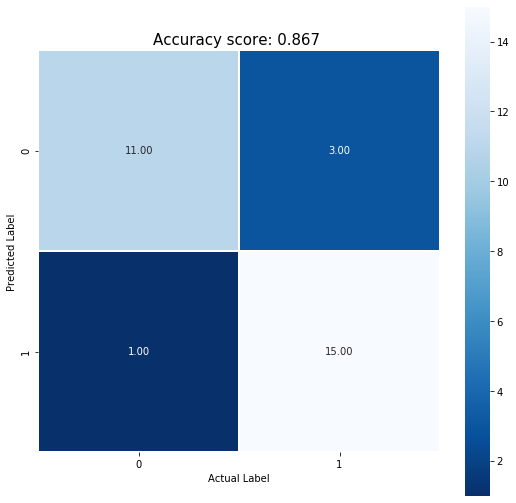

In [46]:
plt.figure(figsize=(9,9))
sns.heatmap(cm2,annot=True,fmt='.2f',linewidths=1,square=True,cmap='Blues_r')
plt.ylabel('Predicted Label')
plt.xlabel('Actual Label')
tit = "Accuracy score: {:.3f} ".format(score)
plt.title(tit,size=15)

In [16]:
df['Target'].value_counts()

1    60
0    40
Name: Target, dtype: int64

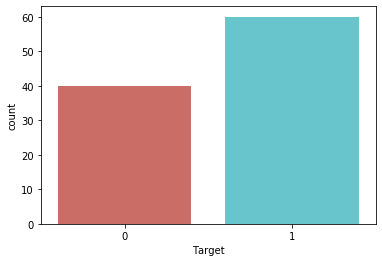

In [17]:
sns.countplot(x='Target',data=df,palette='hls')
plt.show()

In [18]:
df.groupby('Target').mean()

,Exam-Score-1,Exam-Score-2
Target,,
0,52.032301,54.620392
1,74.718923,73.956402


In [19]:
scores = cross_val_score(clf,X,y,cv=5)
scores

array([0.85, 0.9 , 0.9 , 0.9 , 0.9 ])

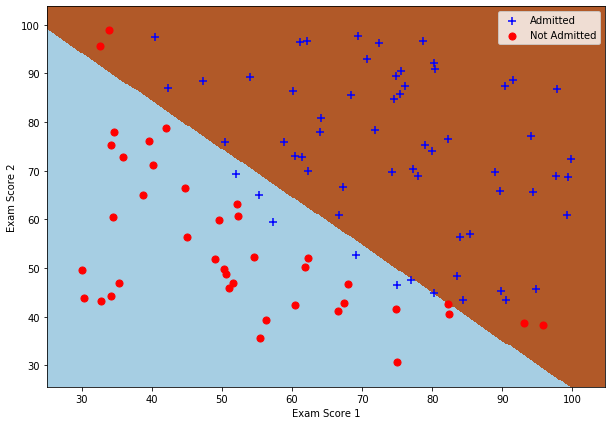

In [62]:
x_min, x_max = X[:,0].min() - 5, X[:,0].max() + 5
y_min, y_max = X[:,1].min() - 5, X[:,1].max() + 5
h = 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
pos = np.where(y==1)
neg = np.where(y==0)
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)
ax1.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
ax1.scatter(X[pos,0], X[pos,1], s=50, c='b', marker="+", label='Admitted')
ax1.scatter(X[neg,0], X[neg,1], s=50, c='r', marker="o", label='Not Admitted')
plt.xlabel('Exam Score 1')
plt.ylabel('Exam Score 2')
plt.legend()

plt.show()

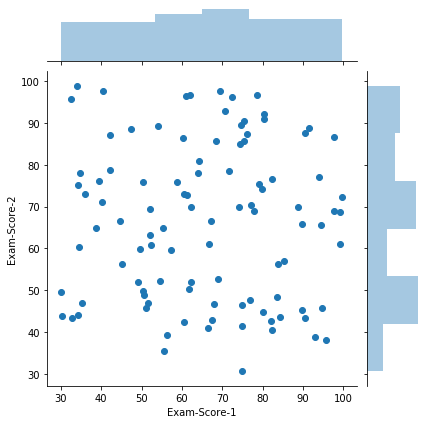

In [66]:
sns.jointplot(df["Exam-Score-1"], df["Exam-Score-2"], kind='scatter')


In [25]:
c_space = np.logspace(-5,8,15)
params = {"C": c_space, "penalty": ['l1', 'l2']}
logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg,params,cv=5)

In [26]:
logreg_cv.fit(X_train,y_train)

C:\Users\dogan\AppData\Local\Continuum\anaconda2\envs\python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\dogan\AppData\Local\Continuum\anaconda2\envs\python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\dogan\AppData\Local\Continuum\anaconda2\envs\python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs suppor

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'penalty': ['l1', 'l2']},
 

In [47]:
logreg_cv.best_score_

0.9285714285714286

In [48]:
logreg_cv.best_params_

{'C': 0.006105402296585327, 'penalty': 'l2'}

In [49]:
y_pred = logreg_cv.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

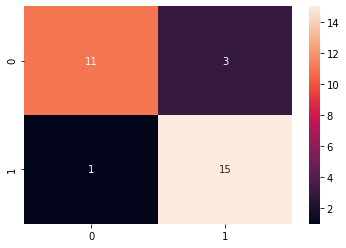

In [50]:
sns.heatmap(cm, annot=True )
plt.show()